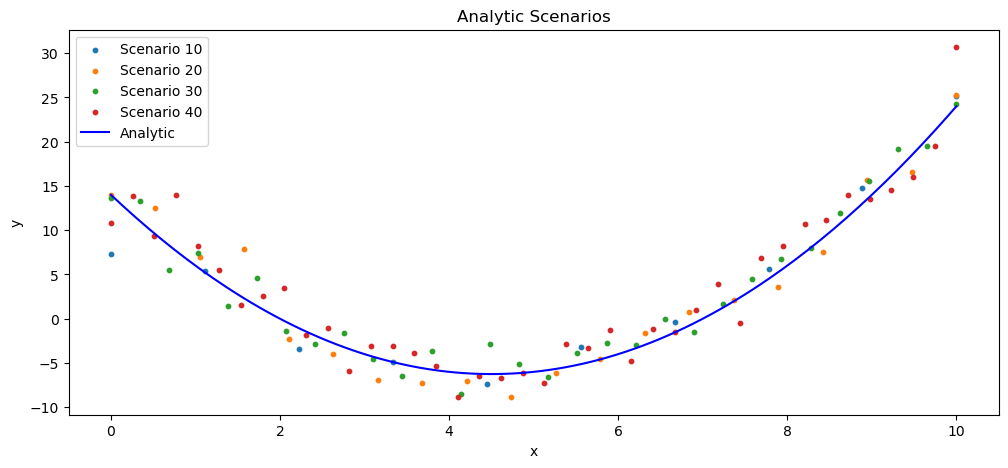

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

f_true = lambda x: x**2 - 9*x + 14

# Scenarios
scenarios = [10, 20, 30, 40]

seed = 79
np.random.seed(seed)

# Dictionary to store data
scenario_data = {}

# Plotting setup
plt.figure(figsize=(12, 5))

# Y_train now has a noise term
# noise follows a normal distribution N(0,2)
# this noise should also be seeded
# Process each scenario
for n in scenarios:
    # Draw from a uniform distribution randomly
    X_train = np.linspace(0, 10, n)
    noise = np.random.normal(0, 2, n)
    Y_train = np.array([f_true(xt) for xt in X_train]) + noise

    # Store data in the dictionary
    scenario_data[n] = (X_train, Y_train)
    plt.scatter(X_train, Y_train, label=f"Scenario {n}", s=10)

# Analytic data with 200 points
X_analytic = np.linspace(0, 10, 200)
Y_analytic = f_true(X_analytic)

plt.title("Analytic Scenarios")
plt.plot(X_analytic, Y_analytic, label="Analytic", color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [5]:
import GPy

# Dictionary to store GP models
gp_models = {}

for n in scenarios:
    # Retrieve training data for this scenario
    X_train, Y_train = scenario_data[n]

    # Define the kernel
    kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

    # Create the GP model
    gp_model = GPy.models.GPRegression(X_train.reshape(-1,1), Y_train.reshape(-1,1), kernel)

    # Optimize the model (find the best hyperparameters)
    gp_model.optimize(messages=True)

    # Store the optimized model
    gp_models[n] = gp_model

    # Print the optimized model's parameter values
    print(f"Model for scenario {n}:")
    print(gp_model)
    print("\n")


Model for scenario 10:

Name : GP regression
Objective : 29.1519491572102
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |   895.2972069972711  |      +ve      |        
  rbf.lengthscale          |   5.900955635830331  |      +ve      |        
  Gaussian_noise.variance  |  2.4330284128458137  |      +ve      |        




Model for scenario 20:

Name : GP regression
Objective : 53.401467308287906
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |  317.8960221381838  |      +ve      |        
  rbf.lengthscale          |   2.74279006238011  |      +ve      |        
  Gaussian_noise.variance  |  3.040081792082855  |      +ve      |        




Model for scenario 30:

Name : GP regression
Objective : 71.07022751702064
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  3785.4810145093415  |      +ve      |        
  rbf.lengthscale          |   8.806314097057138  |      +ve      |        
  Gaussian_noise.variance  |  2.8245583003627037  |      +ve      |        




Model for scenario 40:

Name : GP regression
Objective : 103.22578158498585
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1394.6129458875694  |      +ve      |        
  rbf.lengthscale          |   6.516782140448055  |      +ve      |        
  Gaussian_noise.variance  |   5.699109909968697  |      +ve      |        




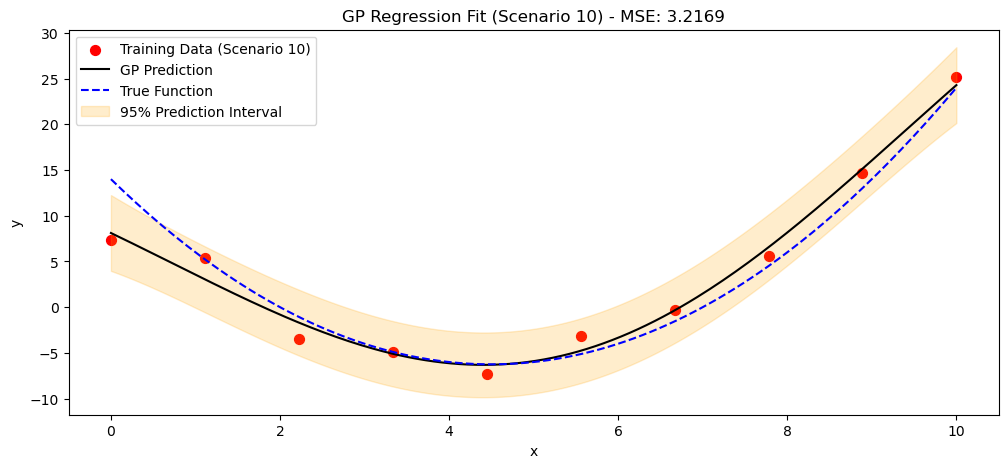

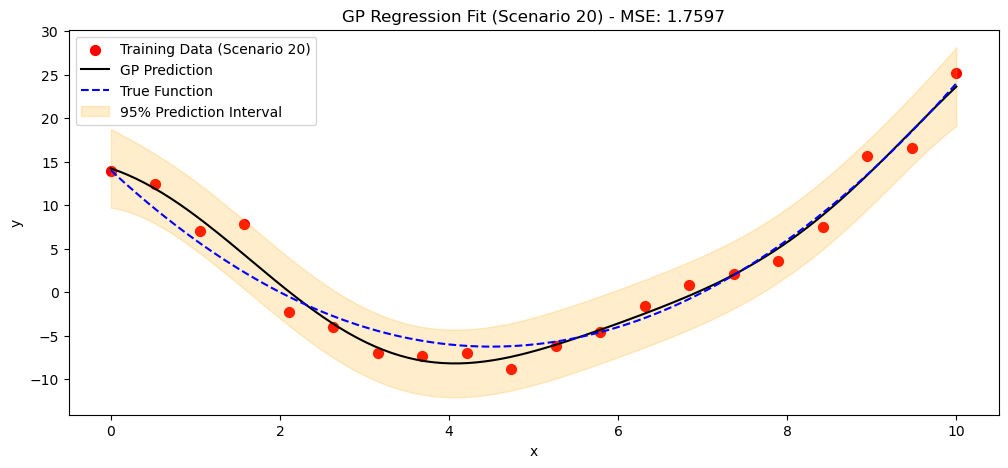

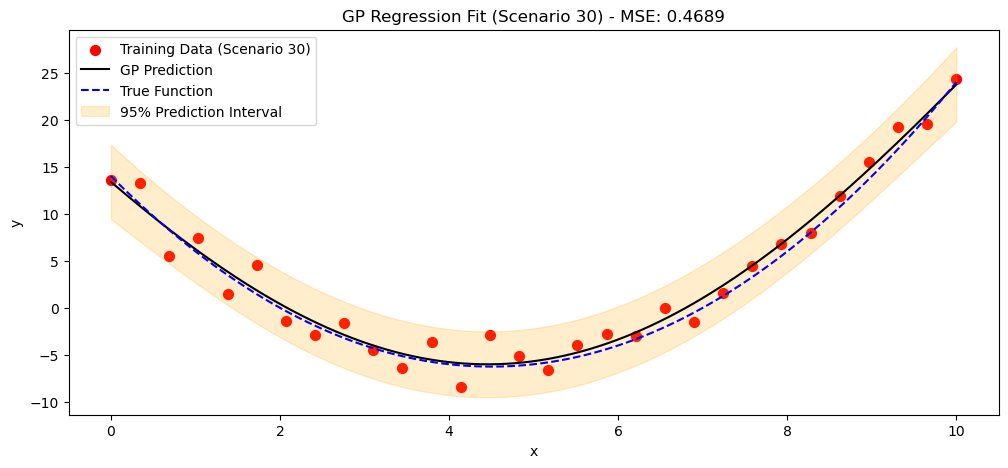

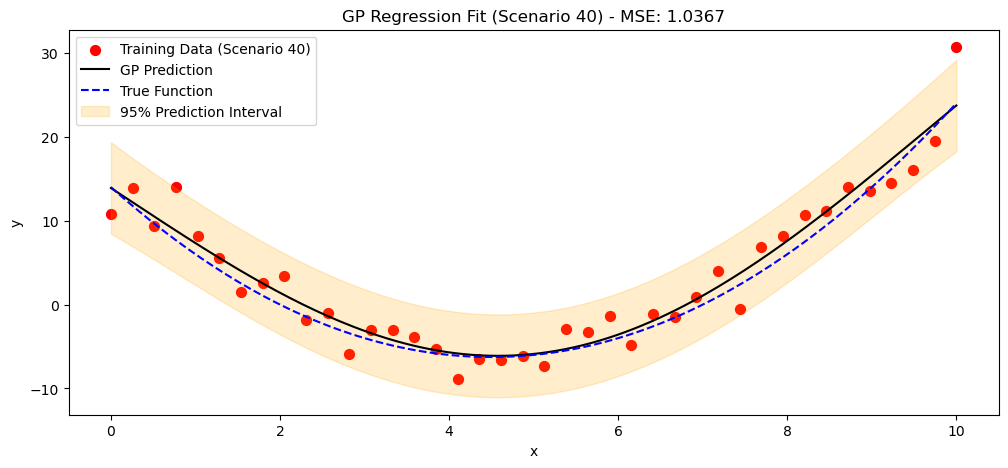

In [6]:
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error
def calculate_mse(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Plot the results
for n in scenarios:
    # Retrieve the GP model for this scenario
    gp_model = gp_models[n]

    # Predictions
    X_pred = np.linspace(0, 10, 200).reshape(-1,1)
    Y_pred, Y_pred_var = gp_model.predict(X_pred)

    # Calculate the true Y values for comparison
    Y_true = np.array([f_true(x) for x in X_pred.flatten()])

    # Calculate MSE
    mse = calculate_mse(Y_true, Y_pred.flatten())

    # Retrieve training data
    X_train, Y_train = scenario_data[n]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.scatter(X_train, Y_train, label=f"Training Data (Scenario {n})", s=50, color='red')
    plt.plot(X_pred.flatten(), Y_pred.flatten(), label="GP Prediction", color='black')
    plt.plot(X_pred.flatten(), Y_true, label="True Function", color='blue', linestyle='--')
    plt.fill_between(X_pred.flatten(),
                     (Y_pred - 2 * np.sqrt(Y_pred_var)).flatten(),
                     (Y_pred + 2 * np.sqrt(Y_pred_var)).flatten(),
                     alpha=0.2, label="95% Prediction Interval", color='orange')
    plt.title(f"GP Regression Fit (Scenario {n}) - MSE: {mse:.4f}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
